In [45]:
import yfinance as yf
import pandas as pd

In [46]:
sp500 = yf.Ticker("^GSPC")

In [47]:
sp500 = sp500.history(period="max")

In [48]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,0,0
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,0,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,0,0


In [49]:
# show index
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-09-01', '2022-09-02', '2022-09-06', '2022-09-07',
               '2022-09-08', '2022-09-09', '2022-09-12', '2022-09-13',
               '2022-09-14', '2022-09-15'],
              dtype='datetime64[ns]', name='Date', length=18295, freq=None)

<AxesSubplot:xlabel='Date'>

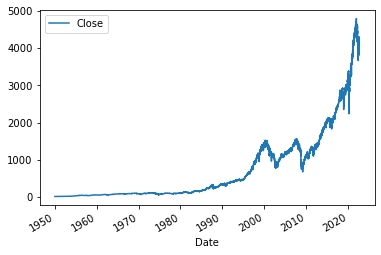

In [50]:
#Plot a line graph for the closing price
sp500.plot.line(y="Close", use_index=True)

In [51]:
# delete redundant columns

del sp500["Dividends"]
del sp500["Stock Splits"]

### Set up target for machine learning

In [52]:
# shift the days

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [53]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010


In [54]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [55]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1


In [56]:
sp500 = sp500.loc["1990-01-01":].copy()

In [57]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,3901940000,4110.410156,1
2022-09-12,4083.669922,4119.279785,4083.669922,4110.410156,3814200000,3932.689941,0
2022-09-13,4037.120117,4037.120117,3921.280029,3932.689941,4224550000,3946.010010,1


### Training an Initial Machine Learning Model

> Random Forest Regressor work by training the many individual decision trees  with randomized parameter and  then averages from decision trees.

>  The higher the n_estimator, the better the model is

>  min_sample_split protect over_fitting. The higher is it set, the less  accurate the model 

>  if we ran the same model twice, we will get the same result when the random_state = 1

In [58]:

#import sklearn
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1 )

This is a time series data, so cross validation does not work with it. 
If you do, your result will be amazing with the training and worrible in the real world

In [59]:
# all rows except last 100 
train = sp500.iloc[:-100]

# the last 100 rows
test = sp500.iloc[-100:]

predictors = ["Close",  "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [60]:
# what percentage of the prediction we said went up actually went up
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [61]:
preds = pd.Series(preds, index=test.index)

In [62]:
preds

Date
2022-04-25    0
2022-04-26    0
2022-04-27    1
2022-04-28    0
2022-04-29    0
             ..
2022-09-09    1
2022-09-12    1
2022-09-13    1
2022-09-14    0
2022-09-15    1
Length: 100, dtype: int64

In [63]:
precision_score(test["Target"], preds)

0.4523809523809524

In [64]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

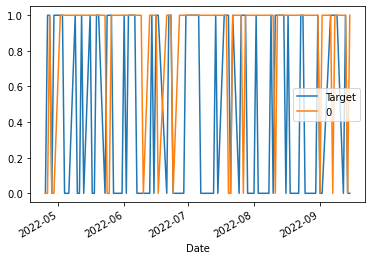

In [65]:
combined.plot()

### BUILDING A BACKTESTING SYSTEM

In [73]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [78]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [79]:
predictions = backtest(sp500, model, predictors)

In [80]:
predictions["Predictions"].value_counts()

0    3339
1    2402
Name: Predictions, dtype: int64

In [81]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5345545378850958